### Import Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define path
path=r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 6\causes_of_deaths_analysis'

# Import Dataframe
df=pd.read_csv(os.path.join(path,'02_data','prepared_data','df_wrangled.csv'))

In [3]:
df.head()

,Unnamed: 0,Country,Code,Year,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,...,Underlying Factor,Continent,Preventable Dis.,Preventable Dis.Norm,Sudden Ext. Cause,Sudden Ext. Cause Norm.,Sudden Int. Cause,Sudden Int. Cause Norm.,GDP Corr.Dis.,GDP Corr.Dis.Norm.
0,0,Afghanistan,AFG,2010,2410,1476,465,1974,377,1837,...,Medical_causes,Asia,91634,313.970903,15514,53.156520,84822,290.630552,23633,80.975122
1,1,Afghanistan,AFG,2011,2327,1508,473,1846,390,1775,...,Medical_causes,Asia,91812,304.846900,15299,50.797856,85708,284.579555,24152,80.192811
2,2,Afghanistan,AFG,2012,2254,1544,482,1705,94,1716,...,Medical_causes,Asia,92139,295.683349,15646,50.209593,86785,278.501822,24699,79.261583
3,3,Afghanistan,AFG,2013,2281,1581,491,1690,143,1777,...,Medical_causes,Asia,93288,289.089520,16258,50.381801,87882,272.336905,25348,78.550737
4,4,Afghanistan,AFG,2014,1935,1620,502,1617,228,1757,...,Medical_causes,Asia,93730,280.874348,16746,50.181605,89181,267.242667,25965,77.807558


In [4]:
df=df.drop(columns=['Unnamed: 0'])

In [5]:
df.columns

Index(['Country', 'Code', 'Year', 'Meningitis', 'Alzheimer's Dis. & Oth.',
       'Parkinson's Dis.', 'Nutr. Def.', 'Malaria', 'Drown.', 'Interp. Viol.',
       'Mat. Dis.', 'HIV/AIDS', 'Drug Use Dis.', 'Tuberculosis',
       'Cardiovascular Dis.', 'Low. Resp. Inf.', 'Neonatal Dis.',
       'Alcohol Use Dis.', 'Self-harm', 'Exp. to Forces of Nat.',
       'Diarr. Dis.', 'Env. Heat and Cold Exp.', 'Neoplasms',
       'Conf. and Terr.', 'Diabetes Mellitus', 'Chr. Kidney Dis.',
       'Poisonings', 'Prot.-Ener. Malnutr.', 'Road Inj.', 'Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.', 'Digestive Dis.', 'Fire, Heat, Hot Subs.',
       'Acute Hep.', 'GDP per capita', 'Population', 'Total GDP', 'Top Cause',
       'Underlying Factor', 'Continent', 'Preventable Dis.',
       'Preventable Dis.Norm', 'Sudden Ext. Cause', 'Sudden Ext. Cause Norm.',
       'Sudden Int. Cause', 'Sudden Int. Cause Norm.', 'GDP Corr.Dis.',
       'GDP Corr.Dis.Norm.'],
      dtype='object')

### Linear Regression

A higher GDP is commonly associated with improved healthcare access, thereby exerting a direct or indirect influence on specific causes of death. These include deaths from infectious diseases, maternal and child mortality, and fatalities resulting from age-related illnesses. In this linear regression analysis, all other influential factors affecting mortality will be disregarded, focusing solely on the regression between a country's total GDP and the aforementioned causes of death.

#### Hypothesis 
*The Higher The GDP, The Lower Mortality From Infectious Diseases, Maternal And Child Mortality, And Fatalities Resulting From Age-Related Illnesses.*

#### Infectious Diseases

1.Preparing the data

In [6]:
# Create column for the infectious diseases
sub_inf_dis=['Meningitis','Nutr. Def.','Malaria','HIV/AIDS','Drug Use Dis.','Tuberculosis',
                'Low. Resp. Inf.','Neonatal Dis.','Diarr. Dis.','Exp. to Forces of Nat.']
df['Infect. Dis.']=df[sub_inf_dis].sum(axis=1)

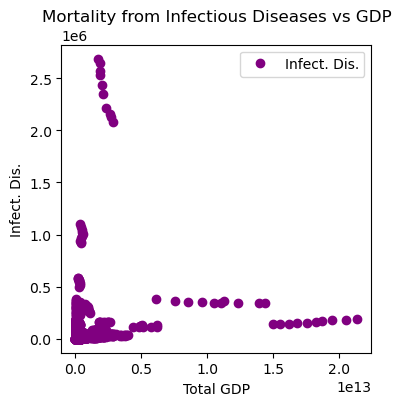

In [7]:
# Display the relationship between dependent infectious diseases and independent total GDP
df.plot(x = 'Total GDP', y='Infect. Dis.',style='o',color='purple')
plt.gcf().set_size_inches(4,4)
plt.title('Mortality from Infectious Diseases vs GDP')  
plt.xlabel('Total GDP')  
plt.ylabel('Infect. Dis.')  
plt.show()

Apart from a few potential outliers, there seems to be a vague or, in some cases, no direct relationship between the two variables.

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X=df['Total GDP'].values.reshape(-1,1)
y=df['Infect. Dis.'].values.reshape(-1,1)

In [9]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

2.Training the regression

In [10]:
# Create a regression object.
regression = LinearRegression()

# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

3.Predicting the testing dependent variable y='Mortality from infectious diseases'

In [11]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

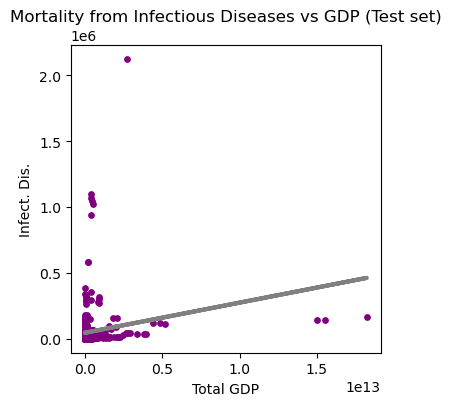

In [19]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='purple', s = 15)
plot_test.plot(X_test, y_predicted, color='gray', linewidth =3)
plt.gcf().set_size_inches(4,4)
plot_test.title('Mortality from Infectious Diseases vs GDP (Test set)')
plot_test.xlabel('Total GDP')
plot_test.ylabel('Mortality: Infectious Dis.')
plot_test.show()

In [13]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.28776692e-08]]
Mean squared error:  20582030956.455776
R2 score:  0.006655002539324051


The positive slope implies that as the GDP increases, so does the mortality from infectious diseases. However, the high mean squared error suggests that the data points are located far away from the regression line, indicating that the regression line isn't an accurate representation of the data. Lastly, the R2 score, nearly equal to 0, indicates that the model itself is not a good fit. A brief examination of the actual and predicted variables should be sufficient to observe the inaccuracy of the model.

In [14]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,18581,46864.718124
1,55,45446.031428
2,218,45555.928153
3,1927,49054.036174
4,731,46770.250438
5,77777,45701.087509
6,79805,45978.742147
7,63382,49862.949286
8,1029,45674.070984
9,655,45868.590941


As expected, the actual and predicted values are too far from being even close to each other. We can't even expect the model to predict better on the train set either.

####  Maternal And Child Mortality

1.Preparing the data

In [23]:
df.columns

Index(['Country', 'Code', 'Year', 'Meningitis', 'Alzheimer's Dis. & Oth.',
       'Parkinson's Dis.', 'Nutr. Def.', 'Malaria', 'Drown.', 'Interp. Viol.',
       'Mat. Dis.', 'HIV/AIDS', 'Drug Use Dis.', 'Tuberculosis',
       'Cardiovascular Dis.', 'Low. Resp. Inf.', 'Neonatal Dis.',
       'Alcohol Use Dis.', 'Self-harm', 'Exp. to Forces of Nat.',
       'Diarr. Dis.', 'Env. Heat and Cold Exp.', 'Neoplasms',
       'Conf. and Terr.', 'Diabetes Mellitus', 'Chr. Kidney Dis.',
       'Poisonings', 'Prot.-Ener. Malnutr.', 'Road Inj.', 'Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.', 'Digestive Dis.', 'Fire, Heat, Hot Subs.',
       'Acute Hep.', 'GDP per capita', 'Population', 'Total GDP', 'Top Cause',
       'Underlying Factor', 'Continent', 'Preventable Dis.',
       'Preventable Dis.Norm', 'Sudden Ext. Cause', 'Sudden Ext. Cause Norm.',
       'Sudden Int. Cause', 'Sudden Int. Cause Norm.', 'GDP Corr.Dis.',
       'GDP Corr.Dis.Norm.', 'Infect. Dis.'],
      dtype='object')

In [24]:
# Create column for the infectious diseases
sub_mat_chl=['Neonatal Dis.','Mat. Dis.']
df['Mat.Chl.']=df[sub_mat_chl].sum(axis=1)

In [36]:
# Calculate the correlaltion coeficient
df['Total GDP'].corr(df['Mat.Chl.'])

0.107006008576599

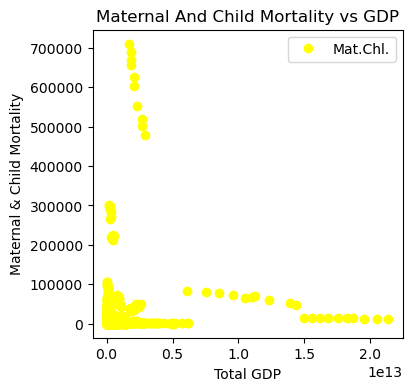

In [27]:
# Display the relationship between dependent infectious diseases and independent total GDP
df.plot(x = 'Total GDP', y='Mat.Chl.',style='o',color='yellow')
plt.gcf().set_size_inches(4,4)
plt.title('Maternal And Child Mortality vs GDP')  
plt.xlabel('Total GDP')  
plt.ylabel('Maternal & Child Mortality')  
plt.show()

The illustrated scatterplot looks similar to the chart plotted to visualize the relationship between mortality from infectious diseases and total GDP. Additionally, the correlation coefficient of 0.107 points to a weak to no linear relationship. For this reason, I will skip the regression analysis for this dependent variable.

#### Age Related Diseases

1.Preparing the data

In [28]:
sub_age_related=['Alzheimer\'s Dis. & Oth.',
       'Parkinson\'s Dis.', 'Cardiovascular Dis.', 'Diabetes Mellitus',
        'Chr. Kidney Dis.','Neoplasms','Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.']
df['Age Related Dis.']=df[sub_age_related].sum(axis=1)

In [34]:
df['Total GDP'].corr(df['Age Related Dis.'])

0.6458365896657501

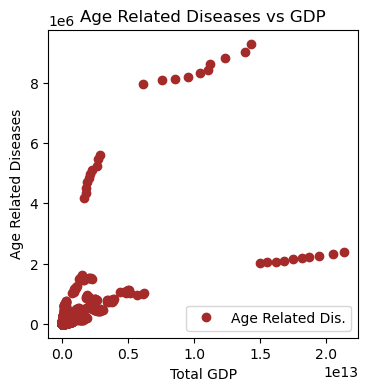

In [30]:
# Display the relationship between dependent infectious diseases and independent total GDP
df.plot(x = 'Total GDP', y='Age Related Dis.',style='o',color='brown')
plt.gcf().set_size_inches(4,4)
plt.title('Mortality from Age Related Diseases vs GDP')  
plt.xlabel('Total GDP')  
plt.ylabel('Mortality: Age-Related Diseases')  
plt.show()

Both correlation coefficient of 0.64 and ploted chart suggest to a relationship between deaths from the age-related ilnesses and total GDP.

2.Training the regression

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_3 = df['Total GDP'].values.reshape(-1,1)
y_3 = df['Age Related Dis.'].values.reshape(-1,1)

In [39]:
# Split data into a training set and a test set.
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [40]:
# Create a regression object.
regression = LinearRegression()

In [41]:
# Fit the regression object onto the training set.
regression.fit(X_3_train, y_3_train)

LinearRegression()

3.Predicting the testing dependent variable y='Mortality from age-related diseases'

In [42]:
# Predict the values of y using X.
y_3_predicted = regression.predict(X_3_test)

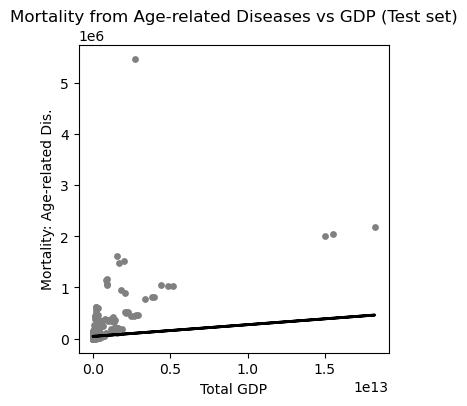

In [46]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_3_test, y_3_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='black', linewidth =2)
plt.gcf().set_size_inches(4,4)
plot_test.title('Mortality from Age-related Diseases vs GDP (Test set)')
plot_test.xlabel('Total GDP')
plot_test.ylabel('Mortality: Age-related Dis.')
plot_test.show()

In [44]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_3_test, y_3_predicted) 
r2 = r2_score(y_3_test, y_3_predicted)

# Print the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.2666322e-07]]
Mean squared error:  116430486794.22932
R2 score:  -0.058787975614918775


We have a positive coeficient of the independent variable suggesting that for every one unit increase in GDP, the mortality also increases by 3.27x10(7). The high result of the mean squared error implies that the predicted values deviate significantly from the actual values. And third, the negatife R2 score points to a bad performing model. 

In [45]:
# Create a dataframe comparing the actual and predicted values of y.
data_3 = pd.DataFrame({'Actual': y_3_test.flatten(), 'Predicted': y_3_predicted.flatten()})
data_3.head(30)

,Actual,Predicted
0,45632,88016.973161
1,254,67759.981116
2,2200,69329.162739
3,117375,119277.573860
4,44102,86668.098060
5,55504,71401.848638
6,31163,75366.394024
7,442705,130827.795988
8,23948,71016.087974
9,31756,73793.578758


The comaparison table supports my findings above.

### Conclusions

The hypothesis set at the beginning couldn't be proven either right or wrong. The most appropriate conclusion to make is that the linear regression is not a good fit to explain the correlation between GDP and different causes of death. Additionaly, while it's known that there is a intercorrelation between the two variables, the GDP alone is not enough to use as a single independent to predict the future deaths. The results highlight the limitaion and challenges of using the linear regresion to model the relationship between GDP and mortality. 

In [47]:
df.to_csv(os.path.join(path,'02_data','prepared_data','df_col_sum.csv'))